# Seminar 14

## Plan
- Reading files with pandas
- Concatenating dataframes
- Summary statistics
- Creating vizualizations with LiK dataset



### Reading files with pandas

In [1]:
import pandas as pd

In [3]:
df1 = pd.read_csv('Drinks_raw(A-C).csv')
df2 = pd.read_csv('Drinks_raw(M-Z).csv')
df3 = pd.read_csv('Drinks_raw(M-Z).csv')

In [ ]:
df1.tail(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
36,China,79,192,8,5.0
37,Colombia,159,76,3,4.2
38,Comoros,1,3,1,0.1
39,Congo,76,1,9,1.7
40,Cook Islands,0,254,74,5.9
41,Costa Rica,149,87,11,4.4
42,Croatia,230,87,254,10.2
43,Cuba,93,137,5,4.2
44,Cyprus,192,154,113,8.2
45,Czech Republic,361,170,134,11.8


### Concatenating

In [4]:
df_main = pd.concat([df1,df2,df3])

In [ ]:
df_main.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


In [ ]:
df_main.tail(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
83,Tanzania,36,6,1,5.7
84,USA,249,158,84,8.7
85,Uruguay,115,35,220,6.6
86,Uzbekistan,25,101,8,2.4
87,Vanuatu,21,18,11,0.9
88,Venezuela,333,100,3,7.7
89,Vietnam,111,2,1,2.0
90,Yemen,6,0,0,0.1
91,Zambia,32,19,4,2.5
92,Zimbabwe,64,18,4,4.7


In [5]:
df_main.shape

(232, 5)

In [7]:
df_main.reset_index()

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,Afghanistan,0,0,0,0.0
1,1,Albania,89,132,54,4.9
2,2,Algeria,25,0,14,0.7
3,3,Andorra,245,138,312,12.4
4,4,Angola,217,57,45,5.9
...,...,...,...,...,...,...
227,88,Venezuela,333,100,3,7.7
228,89,Vietnam,111,2,1,2.0
229,90,Yemen,6,0,0,0.1
230,91,Zambia,32,19,4,2.5


In [8]:
df_main.reset_index(drop=True)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
227,Venezuela,333,100,3,7.7
228,Vietnam,111,2,1,2.0
229,Yemen,6,0,0,0.1
230,Zambia,32,19,4,2.5


In [ ]:
df_main = df_main.reset_index(drop=True)

In [13]:
df4 = pd.DataFrame({'country':['Kyrgyzstan','Uzbekistan'], 'beer_servings':[20,25], 'non-alc bev':['cola','pepsi']}, index=[0,1])

In [14]:
df4.head()

,country,beer_servings,non-alc bev
0,Kyrgyzstan,20,cola
1,Uzbekistan,25,pepsi


In [15]:
pd.concat([df_main,df4])

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,non-alc bev
0,Afghanistan,0,0.0,0.0,0.0,NaN
1,Albania,89,132.0,54.0,4.9,NaN
2,Algeria,25,0.0,14.0,0.7,NaN
3,Andorra,245,138.0,312.0,12.4,NaN
4,Angola,217,57.0,45.0,5.9,NaN
...,...,...,...,...,...,...
90,Yemen,6,0.0,0.0,0.1,NaN
91,Zambia,32,19.0,4.0,2.5,NaN
92,Zimbabwe,64,18.0,4.0,4.7,NaN
0,Kyrgyzstan,20,NaN,NaN,NaN,cola


In [16]:
pd.concat([df_main,df4], join='inner')

,country,beer_servings
0,Afghanistan,0
1,Albania,89
2,Algeria,25
3,Andorra,245
4,Angola,217
...,...,...
90,Yemen,6
91,Zambia,32
92,Zimbabwe,64
0,Kyrgyzstan,20


### Concatenating horizontally 

In [17]:
df_h1 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])

In [18]:
df_h1.head()

,letter,number
0,c,3
1,d,4


In [21]:
df_h2 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])

In [23]:
df_h2.head()

,animal,name
0,bird,polly
1,monkey,george


In [24]:
pd.concat([df_h1, df_h2], axis=1)

,letter,number,animal,name
0,c,3,bird,polly
1,d,4,monkey,george


## Summary statistics
### Load dataset VideoGames

In [25]:
df = pd.read_csv('vgsales.csv')

In [26]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [27]:
df['NA_Sales'].mean()

0.26466742981084057

In [28]:
df[['NA_Sales', 'EU_Sales']].mean()

NA_Sales    0.264667
EU_Sales    0.146652
dtype: float64

In [29]:
df[['NA_Sales', 'EU_Sales']].describe()

,NA_Sales,EU_Sales
count,16598.000000,16598.000000
mean,0.264667,0.146652
std,0.816683,0.505351
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.080000,0.020000
75%,0.240000,0.110000
max,41.490000,29.020000


In [32]:
df.agg({'NA_Sales':['min','max','median'], 'EU_Sales':['min','max','median']})

,NA_Sales,EU_Sales
min,0.00,0.00
max,41.49,29.02
median,0.08,0.02


In [30]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Load Mtcars dataset

In [61]:
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')

In [62]:
data.rename(columns={'Unnamed: 0':'brand'}, inplace=True)

In [51]:
data.head()

,brand,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [54]:
data[['hp', 'am']].groupby('am').mean()

,hp
am,
0,160.263158
1,126.846154


In [55]:
data.groupby('am').mean()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
am,,,,,,,,,,
0,17.147368,6.947368,290.378947,160.263158,3.286316,3.768895,18.183158,0.368421,3.210526,2.736842
1,24.392308,5.076923,143.530769,126.846154,4.050000,2.411000,17.360000,0.538462,4.384615,2.923077


In [56]:
data.groupby('am')['cyl','wt'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cyl,wt
am,,
0,6.947368,3.768895
1,5.076923,2.411000


In [64]:
data.groupby(['am','cyl'])['hp'].mean()

am  cyl
0   4       84.666667
    6      115.250000
    8      194.166667
1   4       81.875000
    6      131.666667
    8      299.500000
Name: hp, dtype: float64

In [65]:
data['am'].value_counts()

0    19
1    13
Name: am, dtype: int64

[Titanic dataset](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)

In [68]:
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

In [69]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [74]:
titanic.groupby(['sex','pclass','who'])['survived'].mean()

sex     pclass  who  
female  1       child    0.666667
                woman    0.978022
        2       child    1.000000
                woman    0.909091
        3       child    0.533333
                woman    0.491228
male    1       child    1.000000
                man      0.352941
        2       child    1.000000
                man      0.080808
        3       child    0.321429
                man      0.119122
Name: survived, dtype: float64

### Load LiK dataset

In [ ]:
df_id1 = pd.read_stata("id1.dta")

In [ ]:
df_id1.head()

,hhid,pid,i100,i101_1,i101_2,i101_3,i101_4,i101_6,i101_7,i101_8,i101_9,i101_10,i103,i102,i104,i106,i107
0,2001,1,9,8,10 (completely satisfied),9,9,9,10 (completely satisfied),9,10 (completely satisfied),9,Some increase,No change,Some increase,7,9
1,2001,2,9,9,4,6,4,9,9,9,9,8,No change,Some increase,Some increase,7,8
2,2001,3,8,8,2,6,3,8,not applicable,7,8,7,No change,No change,Some increase,7,completely willing to take risks
3,2002,1,6,6,6,6,6,6,5,6,6,5,Some increase,Some increase,No change,6,2
4,2003,1,8,7,8,8,8,8,8,8,8,8,No change,Some increase,Some increase,8,5


In [ ]:
df_id1 = df_id1.astype({"pid": int, "hhid": int})
df_id1["ID"] = df_id1["hhid"]*100+ df_id1["pid"]

In [ ]:
dfhh1a = pd.read_stata("hh1a.dta")

In [ ]:
dfhh1a.head()

,hhid,pid,h102,h103m,h103y,h103a,h104,h105,h108,h108a,h109,h110
0,2001,1,male,11,1973,43,head,kyrgyz,married,2.0,yes,NaN
1,2001,2,female,4,1973,43,spouse/ partner,kyrgyz,married,1.0,yes,NaN
2,2001,3,female,7,1997,19,son/ daughter,kyrgyz,single,NaN,yes,NaN
3,2001,4,male,2,2002,14,son/ daughter,kyrgyz,NaN,NaN,yes,NaN
4,2001,5,male,11,2006,10,son/ daughter,kyrgyz,NaN,NaN,yes,NaN


In [ ]:
dfhh1a = dfhh1a.astype({"pid": int, "hhid": int})
dfhh1a["ID"] = dfhh1a["hhid"]*100+ dfhh1a["pid"]

In [ ]:
df_big = pd.merge(df_id1, dfhh1a, how='inner', on="ID")

In [ ]:
df_big.dtypes

hhid_x        int64
pid_x         int64
i100       category
i101_1     category
i101_2     category
i101_3     category
i101_4     category
i101_6     category
i101_7     category
i101_8     category
i101_9     category
i101_10    category
i103       category
i102       category
i104       category
i106       category
i107       category
ID            int64
hhid_y        int64
pid_y         int64
h102       category
h103m          int8
h103y         int16
h103a          int8
h104       category
h105       category
h108       category
h108a       float64
h109       category
h110       category
dtype: object

In [ ]:
df_big['i100'] = df_big['i100'].cat.codes
df_big['i100'] = df_big['i100'].astype('int')

In [ ]:
df_big.head()

,hhid_x,pid_x,i100,i101_1,i101_2,i101_3,i101_4,i101_6,i101_7,i101_8,i101_9,i101_10,i103,i102,i104,i106,i107,ID,hhid_y,pid_y,h102,h103m,h103y,h103a,h104,h105,h108,h108a,h109,h110
0,2001,1,9,8,10 (completely satisfied),9,9,9,10 (completely satisfied),9,10 (completely satisfied),9,Some increase,No change,Some increase,7,9,200101,2001,1,male,11,1973,43,head,kyrgyz,married,2.0,yes,NaN
1,2001,2,9,9,4,6,4,9,9,9,9,8,No change,Some increase,Some increase,7,8,200102,2001,2,female,4,1973,43,spouse/ partner,kyrgyz,married,1.0,yes,NaN
2,2001,3,8,8,2,6,3,8,not applicable,7,8,7,No change,No change,Some increase,7,completely willing to take risks,200103,2001,3,female,7,1997,19,son/ daughter,kyrgyz,single,NaN,yes,NaN
3,2002,1,6,6,6,6,6,6,5,6,6,5,Some increase,Some increase,No change,6,2,200201,2002,1,female,11,1952,64,head,kyrgyz,divorced,NaN,yes,NaN
4,2003,1,8,7,8,8,8,8,8,8,8,8,No change,Some increase,Some increase,8,5,200301,2003,1,female,4,1957,59,head,kyrgyz,widowed,NaN,yes,NaN


In [ ]:
import seaborn as sns
sns.set_theme()

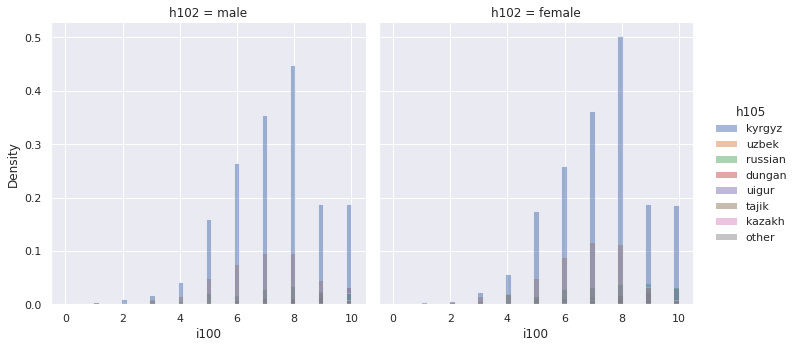

In [ ]:
sns.displot(df_big, x="i100", hue="h105", col ="h102", stat="density",d)

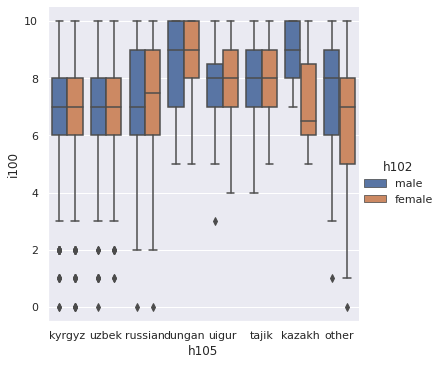

In [ ]:
sns.catplot(x="h105", y="i100", kind="box", hue ="h102", data=df_big)

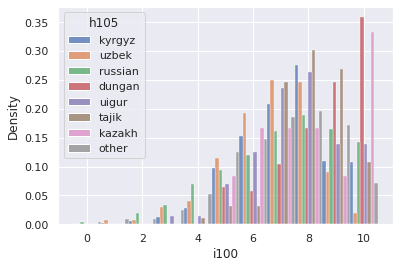

In [ ]:
sns.histplot(
    data=df_big, x="i100", hue="h105",
    stat="density", common_norm=False, multiple="dodge", discrete =True
)